In [ ]:
# I need to plot U vs (T-Tc) N^(1/v)

In [2]:
from euclidianNetwork import EuclidianNetwork
from isingNetwork import IsingModel
import matplotlib.pyplot as plt
import numpy as np
from joblib import Parallel, delayed    #to compute things in parallel
import multiprocessing
from tqdm import tqdm

In [158]:
delta_range = [0, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8]
Tc_range = [2.2, 2.25, 2.3, 2.1, 2.0, 1.8, 1.65, 1.4, 1.2]
N_range = [50, 100, 150, 200, 250]

t_range = np.arange(0, 5, 0.1)
#v_range = np.arange(1.7, 2.6, 0.1)
v_range = [1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3]


simulations = 5
num_cores = multiprocessing.cpu_count()

In [53]:
def binderVsT(delta):
    
    def binderForN(N):
        
        g = EuclidianNetwork(N, delta)
        model = IsingModel(g.get_graph(), temperature_range=t_range)

        model.iterate(simulations=simulations)
        return model.get_data('binder_cumulant')
    
    U = Parallel(n_jobs=num_cores)(delayed(binderForN)(N) for N in N_range)
    
    return U

In [55]:
delta = delta_range[2]

U = binderVsT(delta)
#U_s = Parallel(n_jobs=num_cores)(delayed(binderVsT)(delta, v) for v in v_range)

In [142]:
#Save data
np.savez('U(T)_N(50,250)_delta=0.6_trange(0,5,0.1).npz', *U)

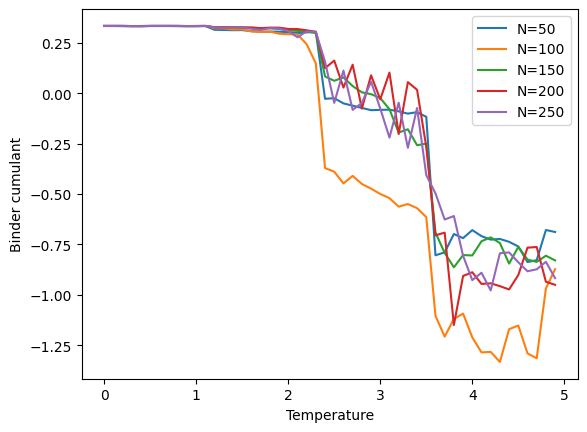

In [144]:
#Data correction. A view before the correction:
for i in range(len(U)):
    plt.plot(t_range, U[i], label='N='+ str(N_range[i]))

plt.legend()
plt.xlabel('Temperature')
plt.ylabel('Binder cumulant')
plt.show()

In [146]:
#Correction of data

for i in range(24, 39):
    U[1][i] += 0.4

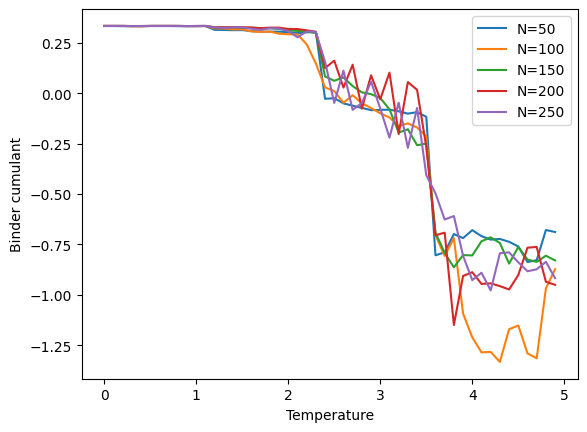

In [150]:
#And view after the correction:

for i in range(len(U)):
    plt.plot(t_range, U[i], label='N='+ str(N_range[i]))

plt.legend()
plt.xlabel('Temperature')
plt.ylabel('Binder cumulant')
plt.show()

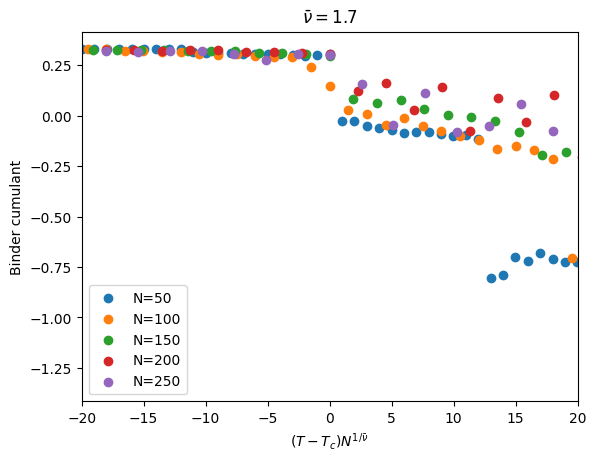

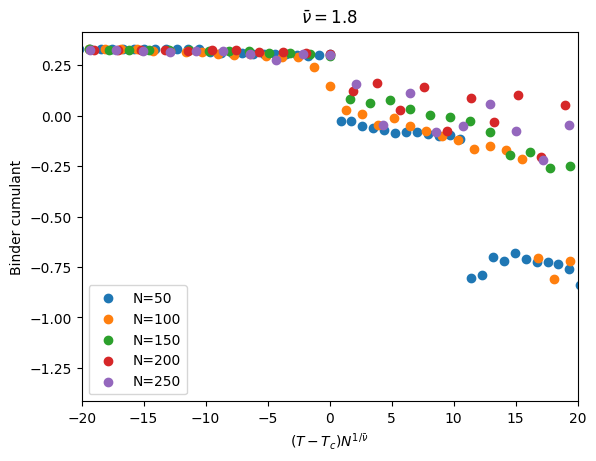

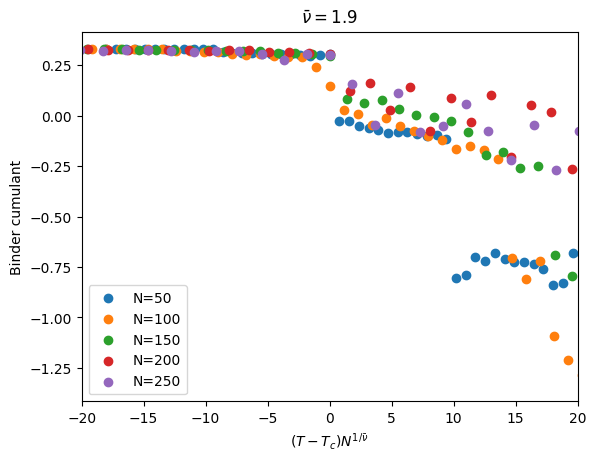

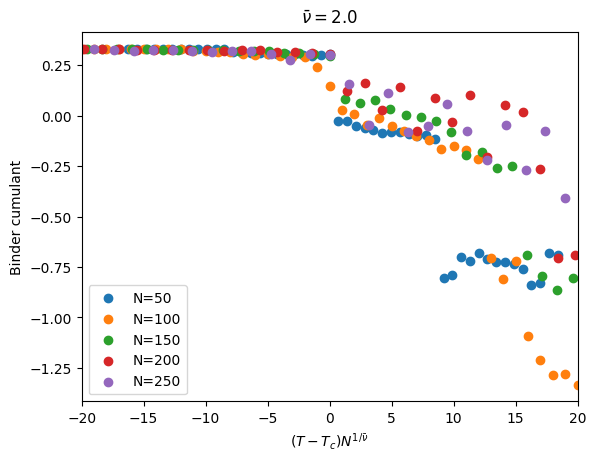

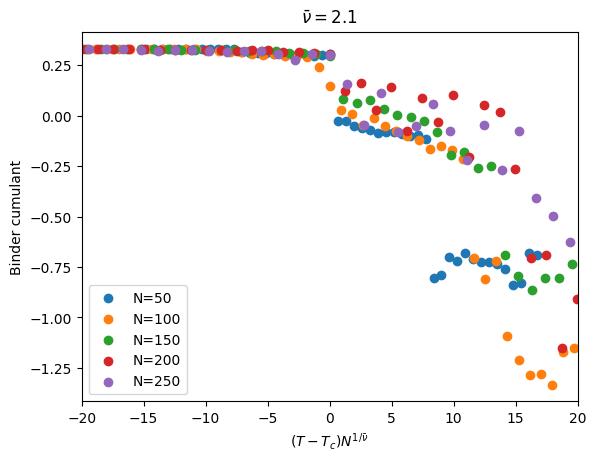

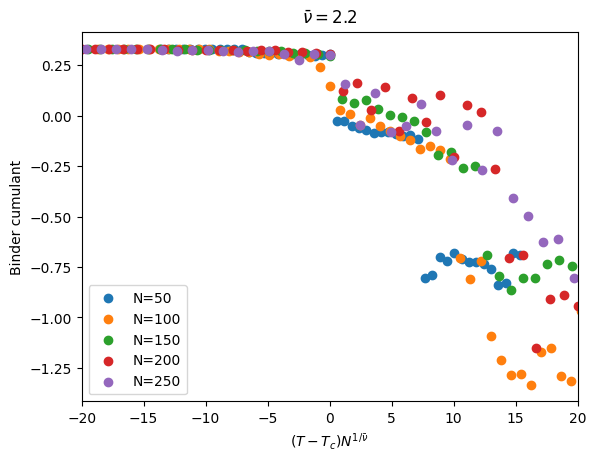

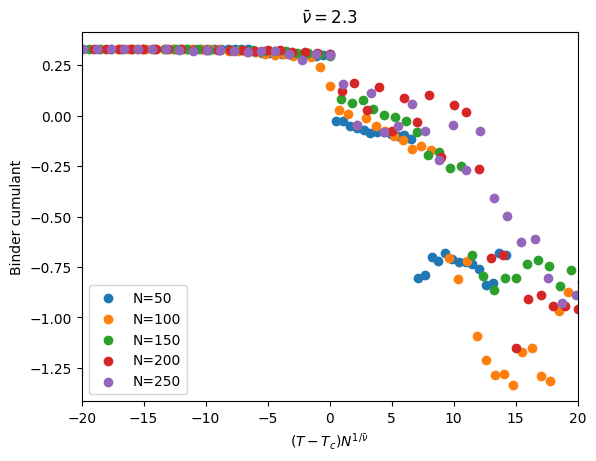

In [163]:
# Now we try plotting for different values of nu

for v in v_range:

    xAxis50 = (t_range - Tc_range[2])* (50**(1/v))
    xAxis100 = (t_range - Tc_range[2])* (100**(1/v))
    xAxis150 = (t_range - Tc_range[2])* (150**(1/v))
    xAxis200 = (t_range - Tc_range[2])* (200**(1/v))
    xAxis250 = (t_range - Tc_range[2])* (250**(1/v))

    xAxis_s = [xAxis50, xAxis100, xAxis150, xAxis200, xAxis250]
    
    #xAxis_s = []
    #for N in range(len(N_range)):
    #    xAxis_s.append((t_range - Tc_range[2])* math.pow(N, (1/v)))

    plt.figure()
    for i in range(len(U)):
        plt.scatter(xAxis_s[i], U[i], label='N='+ str(N_range[i]))
        plt.xlim(-20,20)

    plt.legend()
    plt.title(r'$\bar{\nu} = $' + str(v))
    plt.xlabel(r'$(T-T_c)N^{1/\bar\nu}$')
    plt.ylabel('Binder cumulant')
    plt.show()